In [1]:
import pandas as pd
import numpy as np
from scipy import integrate

In [2]:
FILEPATH = "../../csv/metrics/BTCUSD-600-20210401-20210630"

In [3]:
FILENAME_KS = f"{FILEPATH}-ks.csv"

In [4]:
df_ks = pd.read_csv(FILENAME_KS)
df_ks

,Unnamed: 0,alpha=0.01,alpha=0.025,alpha=0.05,alpha=0.075,alpha=0.1
0,n=86400,2.107872e-06,1.201272e-06,8.035729e-07,6.336269e-07,5.445649e-07
1,n=172800,1.667710e-06,9.472420e-07,6.311937e-07,4.961390e-07,4.153696e-07
2,n=259200,1.453409e-06,8.235634e-07,5.472681e-07,4.292008e-07,3.565055e-07
3,n=345600,1.317916e-06,7.453663e-07,4.942053e-07,3.868784e-07,3.207962e-07
4,n=432000,1.221366e-06,6.896449e-07,4.563940e-07,3.567205e-07,2.953505e-07
5,n=518400,1.147613e-06,6.470799e-07,4.275104e-07,3.336832e-07,2.759129e-07
6,n=604800,1.088641e-06,6.130456e-07,4.044154e-07,3.152629e-07,2.603708e-07
7,n=691200,1.039938e-06,5.849373e-07,3.853418e-07,3.000500e-07,2.475350e-07
8,n=777600,9.987318e-07,5.611562e-07,3.692044e-07,2.871790e-07,2.366751e-07
9,n=864000,9.632108e-07,5.406560e-07,3.552934e-07,2.760838e-07,2.273135e-07


In [5]:
# 60d in is in seconds ...
60 * 86400

5184000

<AxesSubplot:>

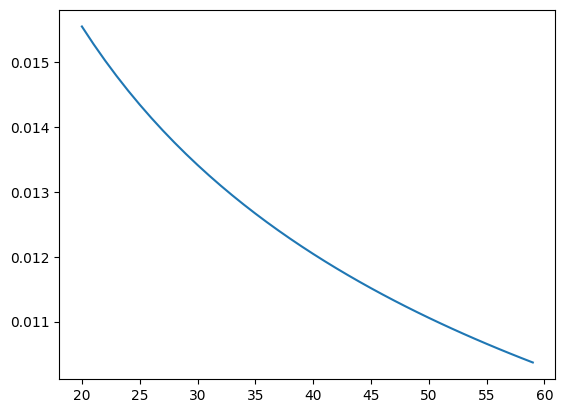

In [6]:
(df_ks['alpha=0.05'].iloc[20:60] * 2 * 3600 * 8).plot()

In [15]:
# looks right at VaR => 0 after 60d charging about ~1% per 8h in extreme

In [7]:
# Look at the EV, VaR, ES calcs

In [8]:
FILENAME_VARS = f"{FILEPATH}-nvars-long-alpha-0.05.csv"

In [9]:
df_vars = pd.read_csv(FILENAME_VARS)
df_vars

,Unnamed: 0,k=8.035729138953908e-07,k=6.311936556207666e-07,k=5.472681178853588e-07,k=4.942052828547648e-07,k=4.5639400410437743e-07,k=4.275103512083534e-07,k=4.044153720339223e-07,k=3.853417544876774e-07,k=3.692044096063373e-07,...,k=1.9197587591239794e-07,k=1.905126923308843e-07,k=1.890865037348685e-07,k=1.8769570275508426e-07,k=1.863387799894198e-07,k=1.8501431637901524e-07,k=1.8372097630176004e-07,k=1.8245750130440153e-07,k=1.8122270440434597e-07,k=1.800154649006776e-07
0,t=3600,0.011357,0.012613,0.013225,0.013612,0.013888,0.014099,0.014267,0.014407,0.014525,...,0.015820,0.015831,0.015841,0.015851,0.015861,0.015871,0.015880,0.015890,0.015899,0.015907
1,t=7200,0.015586,0.018110,0.019342,0.020121,0.020676,0.021101,0.021441,0.021721,0.021959,...,0.024570,0.024592,0.024613,0.024633,0.024653,0.024673,0.024692,0.024711,0.024729,0.024747
2,t=10800,0.018163,0.021961,0.023815,0.024990,0.025827,0.026467,0.026979,0.027403,0.027761,...,0.031703,0.031735,0.031767,0.031798,0.031828,0.031858,0.031887,0.031915,0.031942,0.031969
3,t=14400,0.019811,0.024886,0.027366,0.028938,0.030059,0.030916,0.031602,0.032169,0.032649,...,0.037933,0.037977,0.038019,0.038061,0.038101,0.038141,0.038180,0.038217,0.038254,0.038290
4,t=18000,0.020831,0.027186,0.030294,0.032264,0.033670,0.034746,0.035606,0.036318,0.036920,...,0.043557,0.043612,0.043665,0.043718,0.043769,0.043818,0.043867,0.043914,0.043961,0.044006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.998412,-0.990560,-0.977518,-0.961086,-0.942471,-0.922450,-0.901535,-0.880070,-0.858294,...,-0.114498,-0.101000,-0.087645,-0.074431,-0.061354,-0.048412,-0.035602,-0.022921,-0.010367,0.002063
1436,t=5173200,-0.998420,-0.990595,-0.977589,-0.961194,-0.942615,-0.922628,-0.901745,-0.880309,-0.858560,...,-0.115030,-0.101530,-0.088174,-0.074959,-0.061880,-0.048936,-0.036124,-0.023441,-0.010885,0.001547
1437,t=5176800,-0.998427,-0.990630,-0.977660,-0.961302,-0.942759,-0.922806,-0.901954,-0.880547,-0.858825,...,-0.115562,-0.102061,-0.088703,-0.075486,-0.062406,-0.049460,-0.036646,-0.023961,-0.011403,0.001032
1438,t=5180400,-0.998435,-0.990666,-0.977730,-0.961409,-0.942902,-0.922983,-0.902162,-0.880785,-0.859090,...,-0.116093,-0.102591,-0.089232,-0.076013,-0.062932,-0.049984,-0.037168,-0.024481,-0.011921,0.000516


In [10]:
# get k at 60d to use for VaR plots
print('n[59]', df_ks['Unnamed: 0'][59])
print('k[59]', df_ks['alpha=0.05'][59])

n[59] n=5184000
k[59] 1.800154649006776e-07


In [14]:
# Find k column manually
df_vars.columns

Index(['Unnamed: 0', 'k=8.035729138953908e-07', 'k=6.311936556207666e-07',
       'k=5.472681178853588e-07', 'k=4.942052828547648e-07',
       'k=4.5639400410437743e-07', 'k=4.275103512083534e-07',
       'k=4.044153720339223e-07', 'k=3.853417544876774e-07',
       'k=3.692044096063373e-07', 'k=3.5529344357102863e-07',
       'k=3.431212706943759e-07', 'k=3.323398431821661e-07',
       'k=3.2269282224999527e-07', 'k=3.139864539876861e-07',
       'k=3.0607105456065984e-07', 'k=2.9882880766426097e-07',
       'k=2.9216547167738875e-07', 'k=2.8600459297517784e-07',
       'k=2.802833740773964e-07', 'k=2.7494966316602434e-07',
       'k=2.6995972101630577e-07', 'k=2.652765379183065e-07',
       'k=2.6086854680929085e-07', 'k=2.5670862652470225e-07',
       'k=2.5277332063845223e-07', 'k=2.490422186705027e-07',
       'k=2.45497461083863e-07', 'k=2.4212333972362135e-07',
       'k=2.3890597260546345e-07', 'k=2.358330371770487e-07',
       'k=2.3289354997353684e-07', 'k=2.3007768338658975e-

In [15]:
k_col = 'k=1.800154649006776e-07'

In [16]:
df_vars[k_col]

0       0.015907
1       0.024747
2       0.031969
3       0.038290
4       0.044006
          ...   
1435    0.002063
1436    0.001547
1437    0.001032
1438    0.000516
1439    0.000000
Name: k=1.800154649006776e-07, Length: 1440, dtype: float64

In [17]:
# vars calculated to 60d out ...
5184000/86400

60.0

In [18]:
# at 60d, should get var = 0

In [19]:
# this is the element/row + 1 index in vars df
5184000.0 / 3600

1440.0

In [20]:
df_vars.iloc[1439]

Unnamed: 0                  t=5184000
k=8.035729138953908e-07     -0.998443
k=6.311936556207666e-07     -0.990701
k=5.472681178853588e-07       -0.9778
k=4.942052828547648e-07     -0.961516
                              ...    
k=1.8501431637901524e-07    -0.050508
k=1.8372097630176004e-07     -0.03769
k=1.8245750130440153e-07    -0.025001
k=1.8122270440434597e-07    -0.012439
k=1.800154649006776e-07           0.0
Name: 1439, Length: 61, dtype: object

In [21]:
# nice ... goes to zero exactly at 60d out (index 719). Math! :)
df_vars[k_col][1430: 1440]

1430    0.004643
1431    0.004127
1432    0.003611
1433    0.003095
1434    0.002579
1435    0.002063
1436    0.001547
1437    0.001032
1438    0.000516
1439    0.000000
Name: k=1.800154649006776e-07, dtype: float64

<AxesSubplot:>

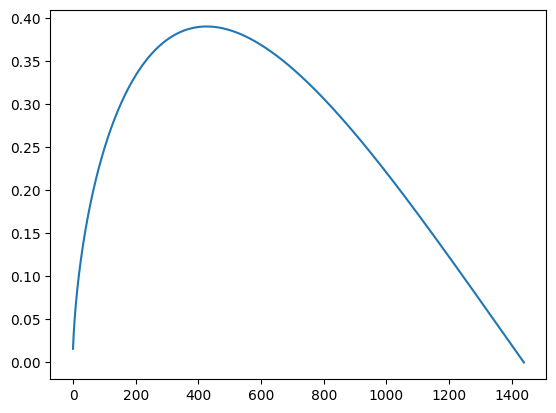

In [22]:
# look at the VaR curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=30d for calibration
# imbalance completely to one side
df_vars[k_col].plot()

In [23]:
# express the x axis in terms of days to make life easier ...
taus = [(i+1) * 3600.0 / 86400.0 for i in df_vars.index]
taus

[0.041666666666666664,
 0.08333333333333333,
 0.125,
 0.16666666666666666,
 0.20833333333333334,
 0.25,
 0.2916666666666667,
 0.3333333333333333,
 0.375,
 0.4166666666666667,
 0.4583333333333333,
 0.5,
 0.5416666666666666,
 0.5833333333333334,
 0.625,
 0.6666666666666666,
 0.7083333333333334,
 0.75,
 0.7916666666666666,
 0.8333333333333334,
 0.875,
 0.9166666666666666,
 0.9583333333333334,
 1.0,
 1.0416666666666667,
 1.0833333333333333,
 1.125,
 1.1666666666666667,
 1.2083333333333333,
 1.25,
 1.2916666666666667,
 1.3333333333333333,
 1.375,
 1.4166666666666667,
 1.4583333333333333,
 1.5,
 1.5416666666666667,
 1.5833333333333333,
 1.625,
 1.6666666666666667,
 1.7083333333333333,
 1.75,
 1.7916666666666667,
 1.8333333333333333,
 1.875,
 1.9166666666666667,
 1.9583333333333333,
 2.0,
 2.0416666666666665,
 2.0833333333333335,
 2.125,
 2.1666666666666665,
 2.2083333333333335,
 2.25,
 2.2916666666666665,
 2.3333333333333335,
 2.375,
 2.4166666666666665,
 2.4583333333333335,
 2.5,
 2.5416666

In [24]:
# check 1d is 1d
taus[23]

1.0

In [25]:
# set back in df vars (remember, tau is in days)
df_vars['tau'] = taus
df_vars

,Unnamed: 0,k=8.035729138953908e-07,k=6.311936556207666e-07,k=5.472681178853588e-07,k=4.942052828547648e-07,k=4.5639400410437743e-07,k=4.275103512083534e-07,k=4.044153720339223e-07,k=3.853417544876774e-07,k=3.692044096063373e-07,...,k=1.905126923308843e-07,k=1.890865037348685e-07,k=1.8769570275508426e-07,k=1.863387799894198e-07,k=1.8501431637901524e-07,k=1.8372097630176004e-07,k=1.8245750130440153e-07,k=1.8122270440434597e-07,k=1.800154649006776e-07,tau
0,t=3600,0.011357,0.012613,0.013225,0.013612,0.013888,0.014099,0.014267,0.014407,0.014525,...,0.015831,0.015841,0.015851,0.015861,0.015871,0.015880,0.015890,0.015899,0.015907,0.041667
1,t=7200,0.015586,0.018110,0.019342,0.020121,0.020676,0.021101,0.021441,0.021721,0.021959,...,0.024592,0.024613,0.024633,0.024653,0.024673,0.024692,0.024711,0.024729,0.024747,0.083333
2,t=10800,0.018163,0.021961,0.023815,0.024990,0.025827,0.026467,0.026979,0.027403,0.027761,...,0.031735,0.031767,0.031798,0.031828,0.031858,0.031887,0.031915,0.031942,0.031969,0.125000
3,t=14400,0.019811,0.024886,0.027366,0.028938,0.030059,0.030916,0.031602,0.032169,0.032649,...,0.037977,0.038019,0.038061,0.038101,0.038141,0.038180,0.038217,0.038254,0.038290,0.166667
4,t=18000,0.020831,0.027186,0.030294,0.032264,0.033670,0.034746,0.035606,0.036318,0.036920,...,0.043612,0.043665,0.043718,0.043769,0.043818,0.043867,0.043914,0.043961,0.044006,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.998412,-0.990560,-0.977518,-0.961086,-0.942471,-0.922450,-0.901535,-0.880070,-0.858294,...,-0.101000,-0.087645,-0.074431,-0.061354,-0.048412,-0.035602,-0.022921,-0.010367,0.002063,59.833333
1436,t=5173200,-0.998420,-0.990595,-0.977589,-0.961194,-0.942615,-0.922628,-0.901745,-0.880309,-0.858560,...,-0.101530,-0.088174,-0.074959,-0.061880,-0.048936,-0.036124,-0.023441,-0.010885,0.001547,59.875000
1437,t=5176800,-0.998427,-0.990630,-0.977660,-0.961302,-0.942759,-0.922806,-0.901954,-0.880547,-0.858825,...,-0.102061,-0.088703,-0.075486,-0.062406,-0.049460,-0.036646,-0.023961,-0.011403,0.001032,59.916667
1438,t=5180400,-0.998435,-0.990666,-0.977730,-0.961409,-0.942902,-0.922983,-0.902162,-0.880785,-0.859090,...,-0.102591,-0.089232,-0.076013,-0.062932,-0.049984,-0.037168,-0.024481,-0.011921,0.000516,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

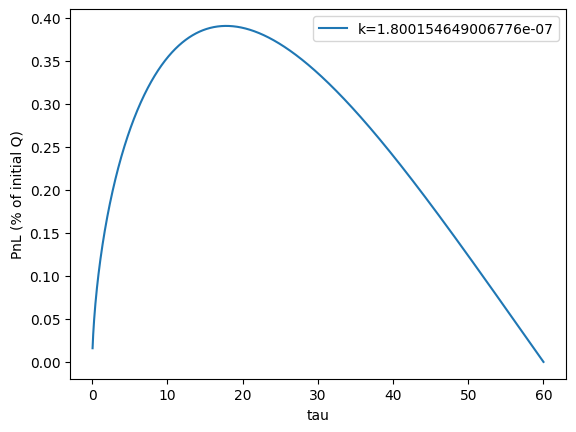

In [26]:
# now make the graph pretty ...
# y axis is % of initial Q at risk to printing as PnL
df_vars.plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

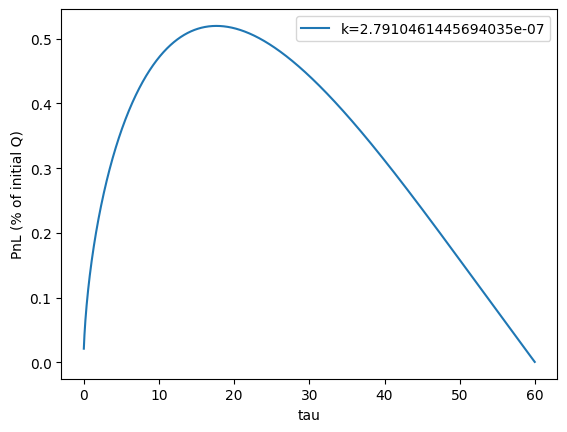

In [36]:
# Look at VaR only over the anchor time ... (first 30d)
df_vars[:1439].plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

In [27]:
# Max 95% VaR value occurs about 20d in at 50% of initial Q. Should use ES to calibrate OI caps! ...

In [28]:
# Look at EV first. It won't be a good measure of how to set OI caps because of losses in there, but still look

In [29]:
FILENAME_EVS = f"{FILEPATH}-nevs-long-alpha-0.05.csv"

In [30]:
df_evs = pd.read_csv(FILENAME_EVS)
df_evs

,Unnamed: 0,k=8.035729138953908e-07,k=6.311936556207666e-07,k=5.472681178853588e-07,k=4.942052828547648e-07,k=4.5639400410437743e-07,k=4.275103512083534e-07,k=4.044153720339223e-07,k=3.853417544876774e-07,k=3.692044096063373e-07,...,k=1.9197587591239794e-07,k=1.905126923308843e-07,k=1.890865037348685e-07,k=1.8769570275508426e-07,k=1.863387799894198e-07,k=1.8501431637901524e-07,k=1.8372097630176004e-07,k=1.8245750130440153e-07,k=1.8122270440434597e-07,k=1.800154649006776e-07
0,t=3600,-0.005373,-0.004138,-0.003536,-0.003155,-0.002884,-0.002677,-0.002511,-0.002374,-0.002258,...,-0.000984,-0.000973,-0.000963,-0.000953,-0.000943,-0.000934,-0.000925,-0.000915,-0.000907,-0.000898
1,t=7200,-0.010718,-0.008260,-0.007060,-0.006301,-0.005760,-0.005346,-0.005016,-0.004742,-0.004511,...,-0.001967,-0.001946,-0.001926,-0.001906,-0.001886,-0.001867,-0.001849,-0.001830,-0.001813,-0.001795
2,t=10800,-0.016035,-0.012364,-0.010572,-0.009437,-0.008628,-0.008009,-0.007514,-0.007105,-0.006759,...,-0.002950,-0.002918,-0.002888,-0.002858,-0.002828,-0.002800,-0.002772,-0.002745,-0.002718,-0.002692
3,t=14400,-0.021323,-0.016452,-0.014072,-0.012564,-0.011488,-0.010666,-0.010007,-0.009463,-0.009003,...,-0.003932,-0.003890,-0.003849,-0.003809,-0.003770,-0.003732,-0.003695,-0.003659,-0.003623,-0.003589
4,t=18000,-0.026583,-0.020523,-0.017560,-0.015681,-0.014340,-0.013315,-0.012494,-0.011816,-0.011242,...,-0.004913,-0.004861,-0.004809,-0.004760,-0.004711,-0.004664,-0.004617,-0.004572,-0.004528,-0.004484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999646,-0.997896,-0.994989,-0.991326,-0.987177,-0.982715,-0.978053,-0.973268,-0.968415,...,-0.802627,-0.799618,-0.796642,-0.793696,-0.790782,-0.787897,-0.785042,-0.782215,-0.779417,-0.776646
1436,t=5173200,-0.999648,-0.997905,-0.995008,-0.991356,-0.987217,-0.982765,-0.978113,-0.973338,-0.968494,...,-0.802870,-0.799863,-0.796887,-0.793944,-0.791030,-0.788147,-0.785293,-0.782468,-0.779671,-0.776902
1437,t=5176800,-0.999650,-0.997914,-0.995027,-0.991385,-0.987257,-0.982816,-0.978174,-0.973408,-0.968573,...,-0.803112,-0.800106,-0.797133,-0.794191,-0.791279,-0.788397,-0.785544,-0.782720,-0.779925,-0.777157
1438,t=5180400,-0.999652,-0.997923,-0.995046,-0.991415,-0.987297,-0.982866,-0.978234,-0.973478,-0.968651,...,-0.803354,-0.800350,-0.797378,-0.794437,-0.791527,-0.788646,-0.785795,-0.782973,-0.780178,-0.777411


In [31]:
k_col in df_evs.columns

True

In [32]:
df_evs[k_col]

0      -0.000898
1      -0.001795
2      -0.002692
3      -0.003589
4      -0.004484
          ...   
1435   -0.776646
1436   -0.776902
1437   -0.777157
1438   -0.777411
1439   -0.777666
Name: k=1.800154649006776e-07, Length: 1440, dtype: float64

<AxesSubplot:>

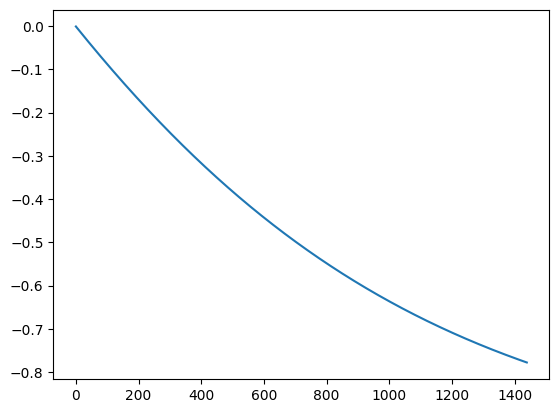

In [33]:
# look at the EV curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=60d for calibration
# imbalance completely to one side
df_evs[k_col].plot()

In [34]:
# set tau back in df evs (remember, tau is in days)
df_evs['tau'] = taus
df_evs

,Unnamed: 0,k=8.035729138953908e-07,k=6.311936556207666e-07,k=5.472681178853588e-07,k=4.942052828547648e-07,k=4.5639400410437743e-07,k=4.275103512083534e-07,k=4.044153720339223e-07,k=3.853417544876774e-07,k=3.692044096063373e-07,...,k=1.905126923308843e-07,k=1.890865037348685e-07,k=1.8769570275508426e-07,k=1.863387799894198e-07,k=1.8501431637901524e-07,k=1.8372097630176004e-07,k=1.8245750130440153e-07,k=1.8122270440434597e-07,k=1.800154649006776e-07,tau
0,t=3600,-0.005373,-0.004138,-0.003536,-0.003155,-0.002884,-0.002677,-0.002511,-0.002374,-0.002258,...,-0.000973,-0.000963,-0.000953,-0.000943,-0.000934,-0.000925,-0.000915,-0.000907,-0.000898,0.041667
1,t=7200,-0.010718,-0.008260,-0.007060,-0.006301,-0.005760,-0.005346,-0.005016,-0.004742,-0.004511,...,-0.001946,-0.001926,-0.001906,-0.001886,-0.001867,-0.001849,-0.001830,-0.001813,-0.001795,0.083333
2,t=10800,-0.016035,-0.012364,-0.010572,-0.009437,-0.008628,-0.008009,-0.007514,-0.007105,-0.006759,...,-0.002918,-0.002888,-0.002858,-0.002828,-0.002800,-0.002772,-0.002745,-0.002718,-0.002692,0.125000
3,t=14400,-0.021323,-0.016452,-0.014072,-0.012564,-0.011488,-0.010666,-0.010007,-0.009463,-0.009003,...,-0.003890,-0.003849,-0.003809,-0.003770,-0.003732,-0.003695,-0.003659,-0.003623,-0.003589,0.166667
4,t=18000,-0.026583,-0.020523,-0.017560,-0.015681,-0.014340,-0.013315,-0.012494,-0.011816,-0.011242,...,-0.004861,-0.004809,-0.004760,-0.004711,-0.004664,-0.004617,-0.004572,-0.004528,-0.004484,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.999646,-0.997896,-0.994989,-0.991326,-0.987177,-0.982715,-0.978053,-0.973268,-0.968415,...,-0.799618,-0.796642,-0.793696,-0.790782,-0.787897,-0.785042,-0.782215,-0.779417,-0.776646,59.833333
1436,t=5173200,-0.999648,-0.997905,-0.995008,-0.991356,-0.987217,-0.982765,-0.978113,-0.973338,-0.968494,...,-0.799863,-0.796887,-0.793944,-0.791030,-0.788147,-0.785293,-0.782468,-0.779671,-0.776902,59.875000
1437,t=5176800,-0.999650,-0.997914,-0.995027,-0.991385,-0.987257,-0.982816,-0.978174,-0.973408,-0.968573,...,-0.800106,-0.797133,-0.794191,-0.791279,-0.788397,-0.785544,-0.782720,-0.779925,-0.777157,59.916667
1438,t=5180400,-0.999652,-0.997923,-0.995046,-0.991415,-0.987297,-0.982866,-0.978234,-0.973478,-0.968651,...,-0.800350,-0.797378,-0.794437,-0.791527,-0.788646,-0.785795,-0.782973,-0.780178,-0.777411,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

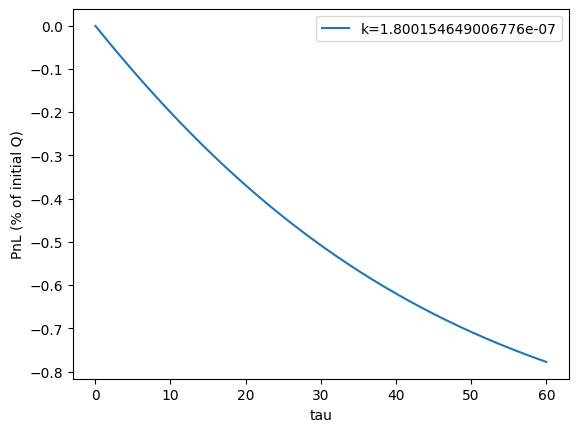

In [35]:
# now make the graph pretty ...
# y axis is % of initial Q expected to be printed as PnL
df_evs.plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

In [36]:
# Yup use ES to calibrate caps on initial Q ... since EV decays like e**(-constant * t) the longer position is held
# NOTE: negative EV to hold position throughout entire anchor time when trading against ONLY the protocol, due to funding

In [37]:
FILENAME_ESS = f"{FILEPATH}-ness-long-conditional-alpha-0.05.csv"

In [38]:
df_ess = pd.read_csv(FILENAME_ESS)
df_ess

,Unnamed: 0,k=8.035729138953908e-07,k=6.311936556207666e-07,k=5.472681178853588e-07,k=4.942052828547648e-07,k=4.5639400410437743e-07,k=4.275103512083534e-07,k=4.044153720339223e-07,k=3.853417544876774e-07,k=3.692044096063373e-07,...,k=1.9197587591239794e-07,k=1.905126923308843e-07,k=1.890865037348685e-07,k=1.8769570275508426e-07,k=1.863387799894198e-07,k=1.8501431637901524e-07,k=1.8372097630176004e-07,k=1.8245750130440153e-07,k=1.8122270440434597e-07,k=1.800154649006776e-07
0,t=3600,0.046307,0.047607,0.048240,0.048641,0.048926,0.049144,0.049319,0.049463,0.049585,...,0.050925,0.050936,0.050947,0.050957,0.050968,0.050978,0.050987,0.050997,0.051006,0.051015
1,t=7200,0.073304,0.075972,0.077273,0.078096,0.078684,0.079132,0.079491,0.079788,0.080039,...,0.082799,0.082821,0.082844,0.082865,0.082887,0.082907,0.082927,0.082947,0.082966,0.082985
2,t=10800,0.095620,0.099707,0.101702,0.102966,0.103867,0.104556,0.105107,0.105562,0.105948,...,0.110190,0.110225,0.110259,0.110292,0.110325,0.110357,0.110388,0.110418,0.110448,0.110477
3,t=14400,0.115217,0.120768,0.123480,0.125198,0.126424,0.127361,0.128112,0.128731,0.129256,...,0.135035,0.135083,0.135129,0.135175,0.135219,0.135262,0.135305,0.135346,0.135386,0.135426
4,t=18000,0.132921,0.139974,0.143423,0.145609,0.147170,0.148363,0.149318,0.150108,0.150776,...,0.158142,0.158203,0.158262,0.158320,0.158377,0.158432,0.158486,0.158539,0.158590,0.158641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.997503,-0.985162,-0.964663,-0.938837,-0.909578,-0.878110,-0.845236,-0.811498,-0.777271,...,0.391806,0.413021,0.434012,0.454781,0.475335,0.495677,0.515812,0.535743,0.555475,0.575012
1436,t=5173200,-0.997517,-0.985226,-0.964794,-0.939040,-0.909853,-0.878456,-0.845649,-0.811976,-0.777810,...,0.390213,0.411419,0.432400,0.453161,0.473707,0.494040,0.514167,0.534091,0.553816,0.573346
1437,t=5176800,-0.997531,-0.985289,-0.964924,-0.939242,-0.910128,-0.878801,-0.846061,-0.812452,-0.778347,...,0.388622,0.409819,0.430791,0.451543,0.472079,0.492405,0.512524,0.532440,0.552157,0.571680
1438,t=5180400,-0.997545,-0.985352,-0.965054,-0.939443,-0.910402,-0.879144,-0.846473,-0.812928,-0.778883,...,0.387032,0.408219,0.429182,0.449925,0.470454,0.490771,0.510882,0.530790,0.550500,0.570016


In [39]:
k_col in df_ess.columns

True

In [40]:
# :) all positive as should be ....
df_ess[k_col]

0       0.051015
1       0.082985
2       0.110477
3       0.135426
4       0.158641
          ...   
1435    0.575012
1436    0.573346
1437    0.571680
1438    0.570016
1439    0.568352
Name: k=1.800154649006776e-07, Length: 1440, dtype: float64

<AxesSubplot:>

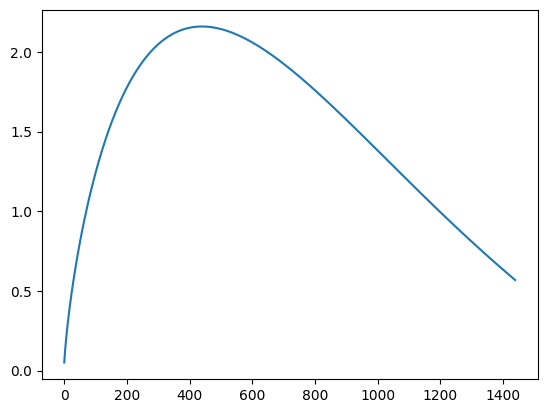

In [41]:
# look at the ES curve from 0 => 60d when holding a position, assuming alpha=0.05, t_alpha=30d for calibration
# imbalance completely to one side
df_ess[k_col].plot()

In [42]:
# TODO: something's wrong with the calculation after 1200. Has to do with my setting to 0 when g_inv < F^{-1}

In [43]:
# Above is the conditional ES ... to get unconditional numbers, multiply by alpha = 0.05

In [44]:
# set tau back in df ess (remember, tau is in days)
df_ess['tau'] = taus
df_ess

,Unnamed: 0,k=8.035729138953908e-07,k=6.311936556207666e-07,k=5.472681178853588e-07,k=4.942052828547648e-07,k=4.5639400410437743e-07,k=4.275103512083534e-07,k=4.044153720339223e-07,k=3.853417544876774e-07,k=3.692044096063373e-07,...,k=1.905126923308843e-07,k=1.890865037348685e-07,k=1.8769570275508426e-07,k=1.863387799894198e-07,k=1.8501431637901524e-07,k=1.8372097630176004e-07,k=1.8245750130440153e-07,k=1.8122270440434597e-07,k=1.800154649006776e-07,tau
0,t=3600,0.046307,0.047607,0.048240,0.048641,0.048926,0.049144,0.049319,0.049463,0.049585,...,0.050936,0.050947,0.050957,0.050968,0.050978,0.050987,0.050997,0.051006,0.051015,0.041667
1,t=7200,0.073304,0.075972,0.077273,0.078096,0.078684,0.079132,0.079491,0.079788,0.080039,...,0.082821,0.082844,0.082865,0.082887,0.082907,0.082927,0.082947,0.082966,0.082985,0.083333
2,t=10800,0.095620,0.099707,0.101702,0.102966,0.103867,0.104556,0.105107,0.105562,0.105948,...,0.110225,0.110259,0.110292,0.110325,0.110357,0.110388,0.110418,0.110448,0.110477,0.125000
3,t=14400,0.115217,0.120768,0.123480,0.125198,0.126424,0.127361,0.128112,0.128731,0.129256,...,0.135083,0.135129,0.135175,0.135219,0.135262,0.135305,0.135346,0.135386,0.135426,0.166667
4,t=18000,0.132921,0.139974,0.143423,0.145609,0.147170,0.148363,0.149318,0.150108,0.150776,...,0.158203,0.158262,0.158320,0.158377,0.158432,0.158486,0.158539,0.158590,0.158641,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,t=5169600,-0.997503,-0.985162,-0.964663,-0.938837,-0.909578,-0.878110,-0.845236,-0.811498,-0.777271,...,0.413021,0.434012,0.454781,0.475335,0.495677,0.515812,0.535743,0.555475,0.575012,59.833333
1436,t=5173200,-0.997517,-0.985226,-0.964794,-0.939040,-0.909853,-0.878456,-0.845649,-0.811976,-0.777810,...,0.411419,0.432400,0.453161,0.473707,0.494040,0.514167,0.534091,0.553816,0.573346,59.875000
1437,t=5176800,-0.997531,-0.985289,-0.964924,-0.939242,-0.910128,-0.878801,-0.846061,-0.812452,-0.778347,...,0.409819,0.430791,0.451543,0.472079,0.492405,0.512524,0.532440,0.552157,0.571680,59.916667
1438,t=5180400,-0.997545,-0.985352,-0.965054,-0.939443,-0.910402,-0.879144,-0.846473,-0.812928,-0.778883,...,0.408219,0.429182,0.449925,0.470454,0.490771,0.510882,0.530790,0.550500,0.570016,59.958333


<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

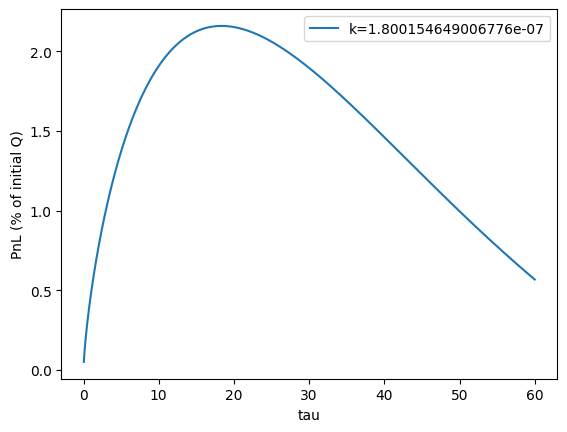

In [45]:
# now make the graph pretty ...
# y axis is % of initial Q expected to be printed as PnL (conditional ES)
df_ess.plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

<AxesSubplot:xlabel='tau', ylabel='PnL (% of initial Q)'>

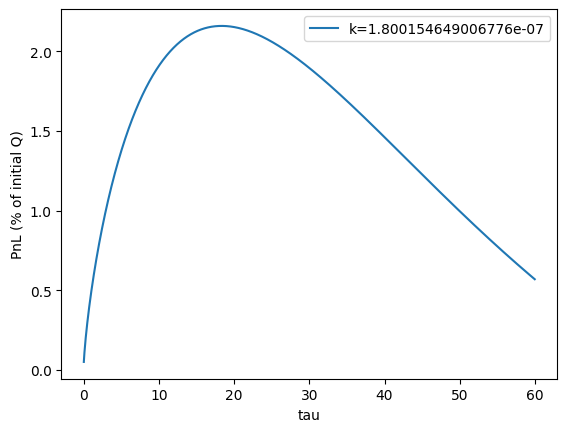

In [46]:
# Look at ES only over the anchor time ... (first 30d)
df_ess[:1439].plot(x='tau', y=k_col, ylabel="PnL (% of initial Q)")

In [47]:
# calibrate cap on Q off of area under curve over the anchor time divided by anchor time .. (first 30d)
# NOTE: this is expected amount printed *when* pnl exceeds var

<AxesSubplot:>

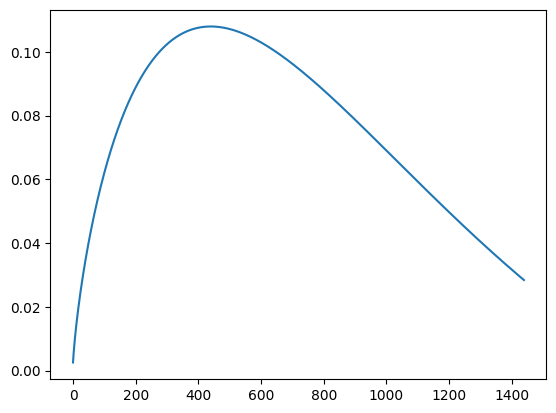

In [48]:
# unconditional ES numbers are alpha * conditional ES
# NOTE: calibrate cap on Q off unconditional ES to facilitate trading
(0.05 * df_ess[k_col]).plot()